In [126]:
import warnings
warnings.filterwarnings("ignore")
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

## Zadanie 1
Zaimplementuj algorytm gęstego kodowania w jednym z wybranych symulatorów

In [127]:
def create_dense_coding_qc(q_1=0, q_0=0):
    qnumber = 4
    qc = QuantumCircuit(qnumber)
    qc.initialize("00" + str(q_1) + str(q_0))
    qc.h(qubit=2)
    qc.cx(control_qubit=2, target_qubit=3)
    qc.cx(control_qubit=1, target_qubit=2)
    qc.cz(control_qubit=0, target_qubit=2)
    qc.cx(control_qubit=2, target_qubit=3)
    qc.h(qubit=2)
    display(qc.draw())
    return qc
    
_ = create_dense_coding_qc()

┌──────────────────────┐                            
q_0: ┤0                     ├────────────────■───────────
     │                      │                │           
q_1: ┤1                     ├────────────■───┼───────────
     │  Initialize(0,0,0,0) │┌───┐     ┌─┴─┐ │      ┌───┐
q_2: ┤2                     ├┤ H ├──■──┤ X ├─■───■──┤ H ├
     │                      │└───┘┌─┴─┐└───┘   ┌─┴─┐└───┘
q_3: ┤3                     ├─────┤ X ├────────┤ X ├─────
     └──────────────────────┘     └───┘        └───┘

q_0, q_1 kontrolują aktywowanie bramek X, Z
q_2, q_3 przenoszą właściwą wartość
```md
| q_1 | q_0 | Bramki | Przesłana wartość |
|-----|-----|--------|-------------------|
| 0   | 0   | I      | 0                 |
| 0   | 1   | Z      | 1                 |
| 1   | 0   | X      | 2                 |
| 1   | 1   | X, Z   | 3                 |
```
Bramki kontrolne X (ostatnia), Z są robocze

In [128]:
def test_statevector(qc):
    return display(Statevector.from_instruction(qc).draw('latex'))

In [129]:
test_statevector(create_dense_coding_qc(0, 0))

┌──────────────────────┐                            
q_0: ┤0                     ├────────────────■───────────
     │                      │                │           
q_1: ┤1                     ├────────────■───┼───────────
     │  Initialize(0,0,0,0) │┌───┐     ┌─┴─┐ │      ┌───┐
q_2: ┤2                     ├┤ H ├──■──┤ X ├─■───■──┤ H ├
     │                      │└───┘┌─┴─┐└───┘   ┌─┴─┐└───┘
q_3: ┤3                     ├─────┤ X ├────────┤ X ├─────
     └──────────────────────┘     └───┘        └───┘

<IPython.core.display.Latex object>

In [130]:
test_statevector(create_dense_coding_qc(0, 1))

┌──────────────────────┐                            
q_0: ┤0                     ├────────────────■───────────
     │                      │                │           
q_1: ┤1                     ├────────────■───┼───────────
     │  Initialize(0,0,0,1) │┌───┐     ┌─┴─┐ │      ┌───┐
q_2: ┤2                     ├┤ H ├──■──┤ X ├─■───■──┤ H ├
     │                      │└───┘┌─┴─┐└───┘   ┌─┴─┐└───┘
q_3: ┤3                     ├─────┤ X ├────────┤ X ├─────
     └──────────────────────┘     └───┘        └───┘

<IPython.core.display.Latex object>

In [131]:
test_statevector(create_dense_coding_qc(1, 0))

┌──────────────────────┐                            
q_0: ┤0                     ├────────────────■───────────
     │                      │                │           
q_1: ┤1                     ├────────────■───┼───────────
     │  Initialize(0,0,1,0) │┌───┐     ┌─┴─┐ │      ┌───┐
q_2: ┤2                     ├┤ H ├──■──┤ X ├─■───■──┤ H ├
     │                      │└───┘┌─┴─┐└───┘   ┌─┴─┐└───┘
q_3: ┤3                     ├─────┤ X ├────────┤ X ├─────
     └──────────────────────┘     └───┘        └───┘

<IPython.core.display.Latex object>

In [132]:
test_statevector(create_dense_coding_qc(1, 1))

┌──────────────────────┐                            
q_0: ┤0                     ├────────────────■───────────
     │                      │                │           
q_1: ┤1                     ├────────────■───┼───────────
     │  Initialize(0,0,1,1) │┌───┐     ┌─┴─┐ │      ┌───┐
q_2: ┤2                     ├┤ H ├──■──┤ X ├─■───■──┤ H ├
     │                      │└───┘┌─┴─┐└───┘   ┌─┴─┐└───┘
q_3: ┤3                     ├─────┤ X ├────────┤ X ├─────
     └──────────────────────┘     └───┘        └───┘

<IPython.core.display.Latex object>

## Zadanie 2
Zaimplementuj algorytm teleportacji kwantowej w jednym z wybranych symulatorów

In [133]:
def create_quantum_teleportation_qc(q_0=0):
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)
    qc = QuantumCircuit(qr, cr)
    qc.initialize("00" + str(q_0))
    qc.h(qubit=1)
    qc.cx(control_qubit=1, target_qubit=2)
    qc.cx(control_qubit=0, target_qubit=1)
    qc.h(qubit=0)
    qc.measure(qubit=0, cbit=0)
    qc.measure(qubit=1, cbit=1)
    qc.x(2).c_if(classical=cr[1], val=1) # apply X to q_2 if c_1 == 1
    qc.z(2).c_if(classical=cr[0], val=1) # apply Z to q_2 if c_0 == 1
    # setting values of registers to simulate the measurement didn't work
    # qc.initialize('0' + str(m_q_1) + str(m_q_0))
    # qc.cx(control_qubit=1, target_qubit=2)
    # qc.cz(control_qubit=0, target_qubit=2)
    qc.measure(qubit=2, cbit=2)
    display(qc.draw())
    return qc
    
_ = create_quantum_teleportation_qc()

┌────────────────────┐               ┌───┐┌─┐                          »
q51_0: ┤0                   ├────────────■──┤ H ├┤M├──────────────────────────»
       │                    │┌───┐     ┌─┴─┐└┬─┬┘└╥┘                          »
q51_1: ┤1 Initialize(0,0,0) ├┤ H ├──■──┤ X ├─┤M├──╫───────────────────────────»
       │                    │└───┘┌─┴─┐└───┘ └╥┘  ║     ┌───┐        ┌───┐    »
q51_2: ┤2                   ├─────┤ X ├───────╫───╫─────┤ X ├────────┤ Z ├────»
       └────────────────────┘     └───┘       ║   ║     └─╥─┘        └─╥─┘    »
                                              ║   ║ ┌─────╨─────┐┌─────╨─────┐»
c50: 3/═══════════════════════════════════════╩═══╩═╡ c50_1=0x1 ╞╡ c50_0=0x1 ╞»
                                              1   0 └───────────┘└───────────┘»
«          
«q51_0: ───
«          
«q51_1: ───
«       ┌─┐
«q51_2: ┤M├
«       └╥┘
«c50: 3/═╩═
«        2


Stan q_0 chcemy przenieść na q_2
```md
| M(q_1) | M(q_0) | Bramki korygujące stan q_2 do q_0 |
|--------|--------|-----------------------------------|
| 0      | 0      | I                                 |
| 0      | 1      | X                                 |
| 1      | 0      | Z                                 |
| 1      | 1      | X, Z                              |
```
Po pomiarach q_1, q_0 należy przesłać wynik drogą klasyczną by odtworzyć stan na q_2
Bramki kontrolne X, Z po pomiarach są robocze

In [134]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Batch, Sampler

service = QiskitRuntimeService()
backend = service.backend('ibmq_qasm_simulator')

def test_sampler(qc, teleport_value):
    with Batch(service=service, backend=backend):
        sampler = Sampler()
        job = sampler.run(
            circuits=[qc],
            shots=1024,
        )
        display(plot_histogram(job.result().quasi_dists[0].binary_probabilities(), 
                               title=f"teleport value {teleport_value} to q_2, measurement on 1st bit from left"))

┌────────────────────┐               ┌───┐┌─┐                          »
q52_0: ┤0                   ├────────────■──┤ H ├┤M├──────────────────────────»
       │                    │┌───┐     ┌─┴─┐└┬─┬┘└╥┘                          »
q52_1: ┤1 Initialize(0,0,0) ├┤ H ├──■──┤ X ├─┤M├──╫───────────────────────────»
       │                    │└───┘┌─┴─┐└───┘ └╥┘  ║     ┌───┐        ┌───┐    »
q52_2: ┤2                   ├─────┤ X ├───────╫───╫─────┤ X ├────────┤ Z ├────»
       └────────────────────┘     └───┘       ║   ║     └─╥─┘        └─╥─┘    »
                                              ║   ║ ┌─────╨─────┐┌─────╨─────┐»
c51: 3/═══════════════════════════════════════╩═══╩═╡ c51_1=0x1 ╞╡ c51_0=0x1 ╞»
                                              1   0 └───────────┘└───────────┘»
«          
«q52_0: ───
«          
«q52_1: ───
«       ┌─┐
«q52_2: ┤M├
«       └╥┘
«c51: 3/═╩═
«        2

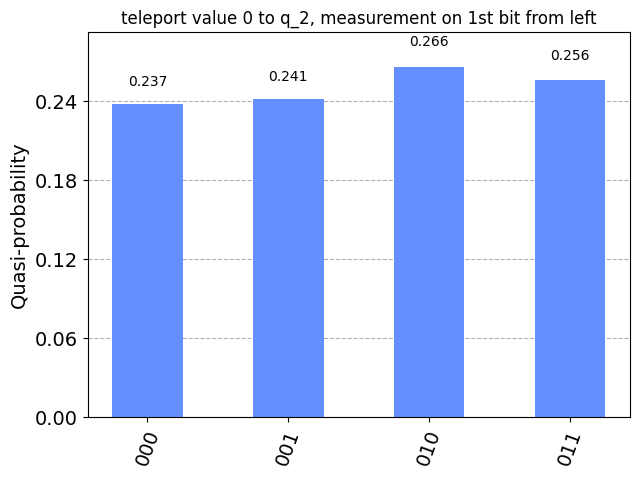

In [135]:
test_sampler(create_quantum_teleportation_qc(q_0=0), 0)

┌────────────────────┐               ┌───┐┌─┐                          »
q53_0: ┤0                   ├────────────■──┤ H ├┤M├──────────────────────────»
       │                    │┌───┐     ┌─┴─┐└┬─┬┘└╥┘                          »
q53_1: ┤1 Initialize(0,0,1) ├┤ H ├──■──┤ X ├─┤M├──╫───────────────────────────»
       │                    │└───┘┌─┴─┐└───┘ └╥┘  ║     ┌───┐        ┌───┐    »
q53_2: ┤2                   ├─────┤ X ├───────╫───╫─────┤ X ├────────┤ Z ├────»
       └────────────────────┘     └───┘       ║   ║     └─╥─┘        └─╥─┘    »
                                              ║   ║ ┌─────╨─────┐┌─────╨─────┐»
c52: 3/═══════════════════════════════════════╩═══╩═╡ c52_1=0x1 ╞╡ c52_0=0x1 ╞»
                                              1   0 └───────────┘└───────────┘»
«          
«q53_0: ───
«          
«q53_1: ───
«       ┌─┐
«q53_2: ┤M├
«       └╥┘
«c52: 3/═╩═
«        2

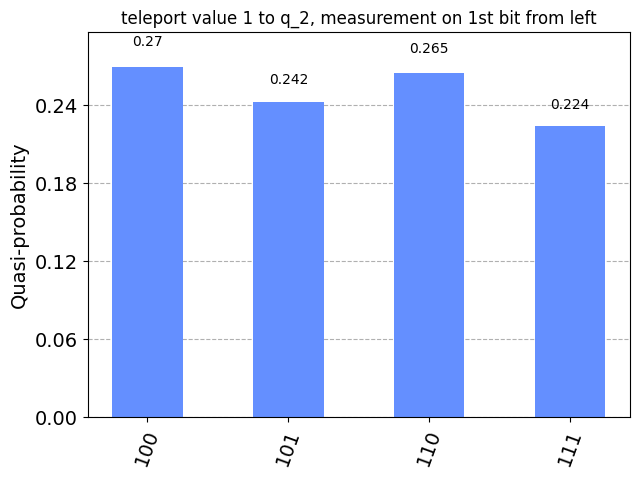

In [136]:
test_sampler(create_quantum_teleportation_qc(q_0=1), 1)